# Comparing Evaluations

                 LR        RF       DNN       SVM
Accuracy   0.653436  0.879900  0.768739  0.761686
Precision  0.653435  0.879884  0.767876  0.756366
Recall     0.653467  0.880245  0.771963  0.784441
F1         0.653436  0.879900  0.768739  0.761686
AUC_ROC    0.705526  0.933928  0.832505  0.826158


/home/useradd/GITHUB/Research/Implementation/plotter.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.columns if group_by_model else df.index, rotation=rotation)


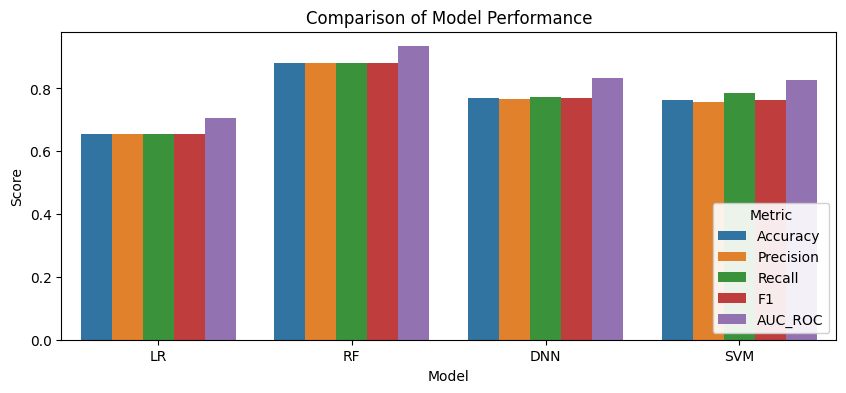

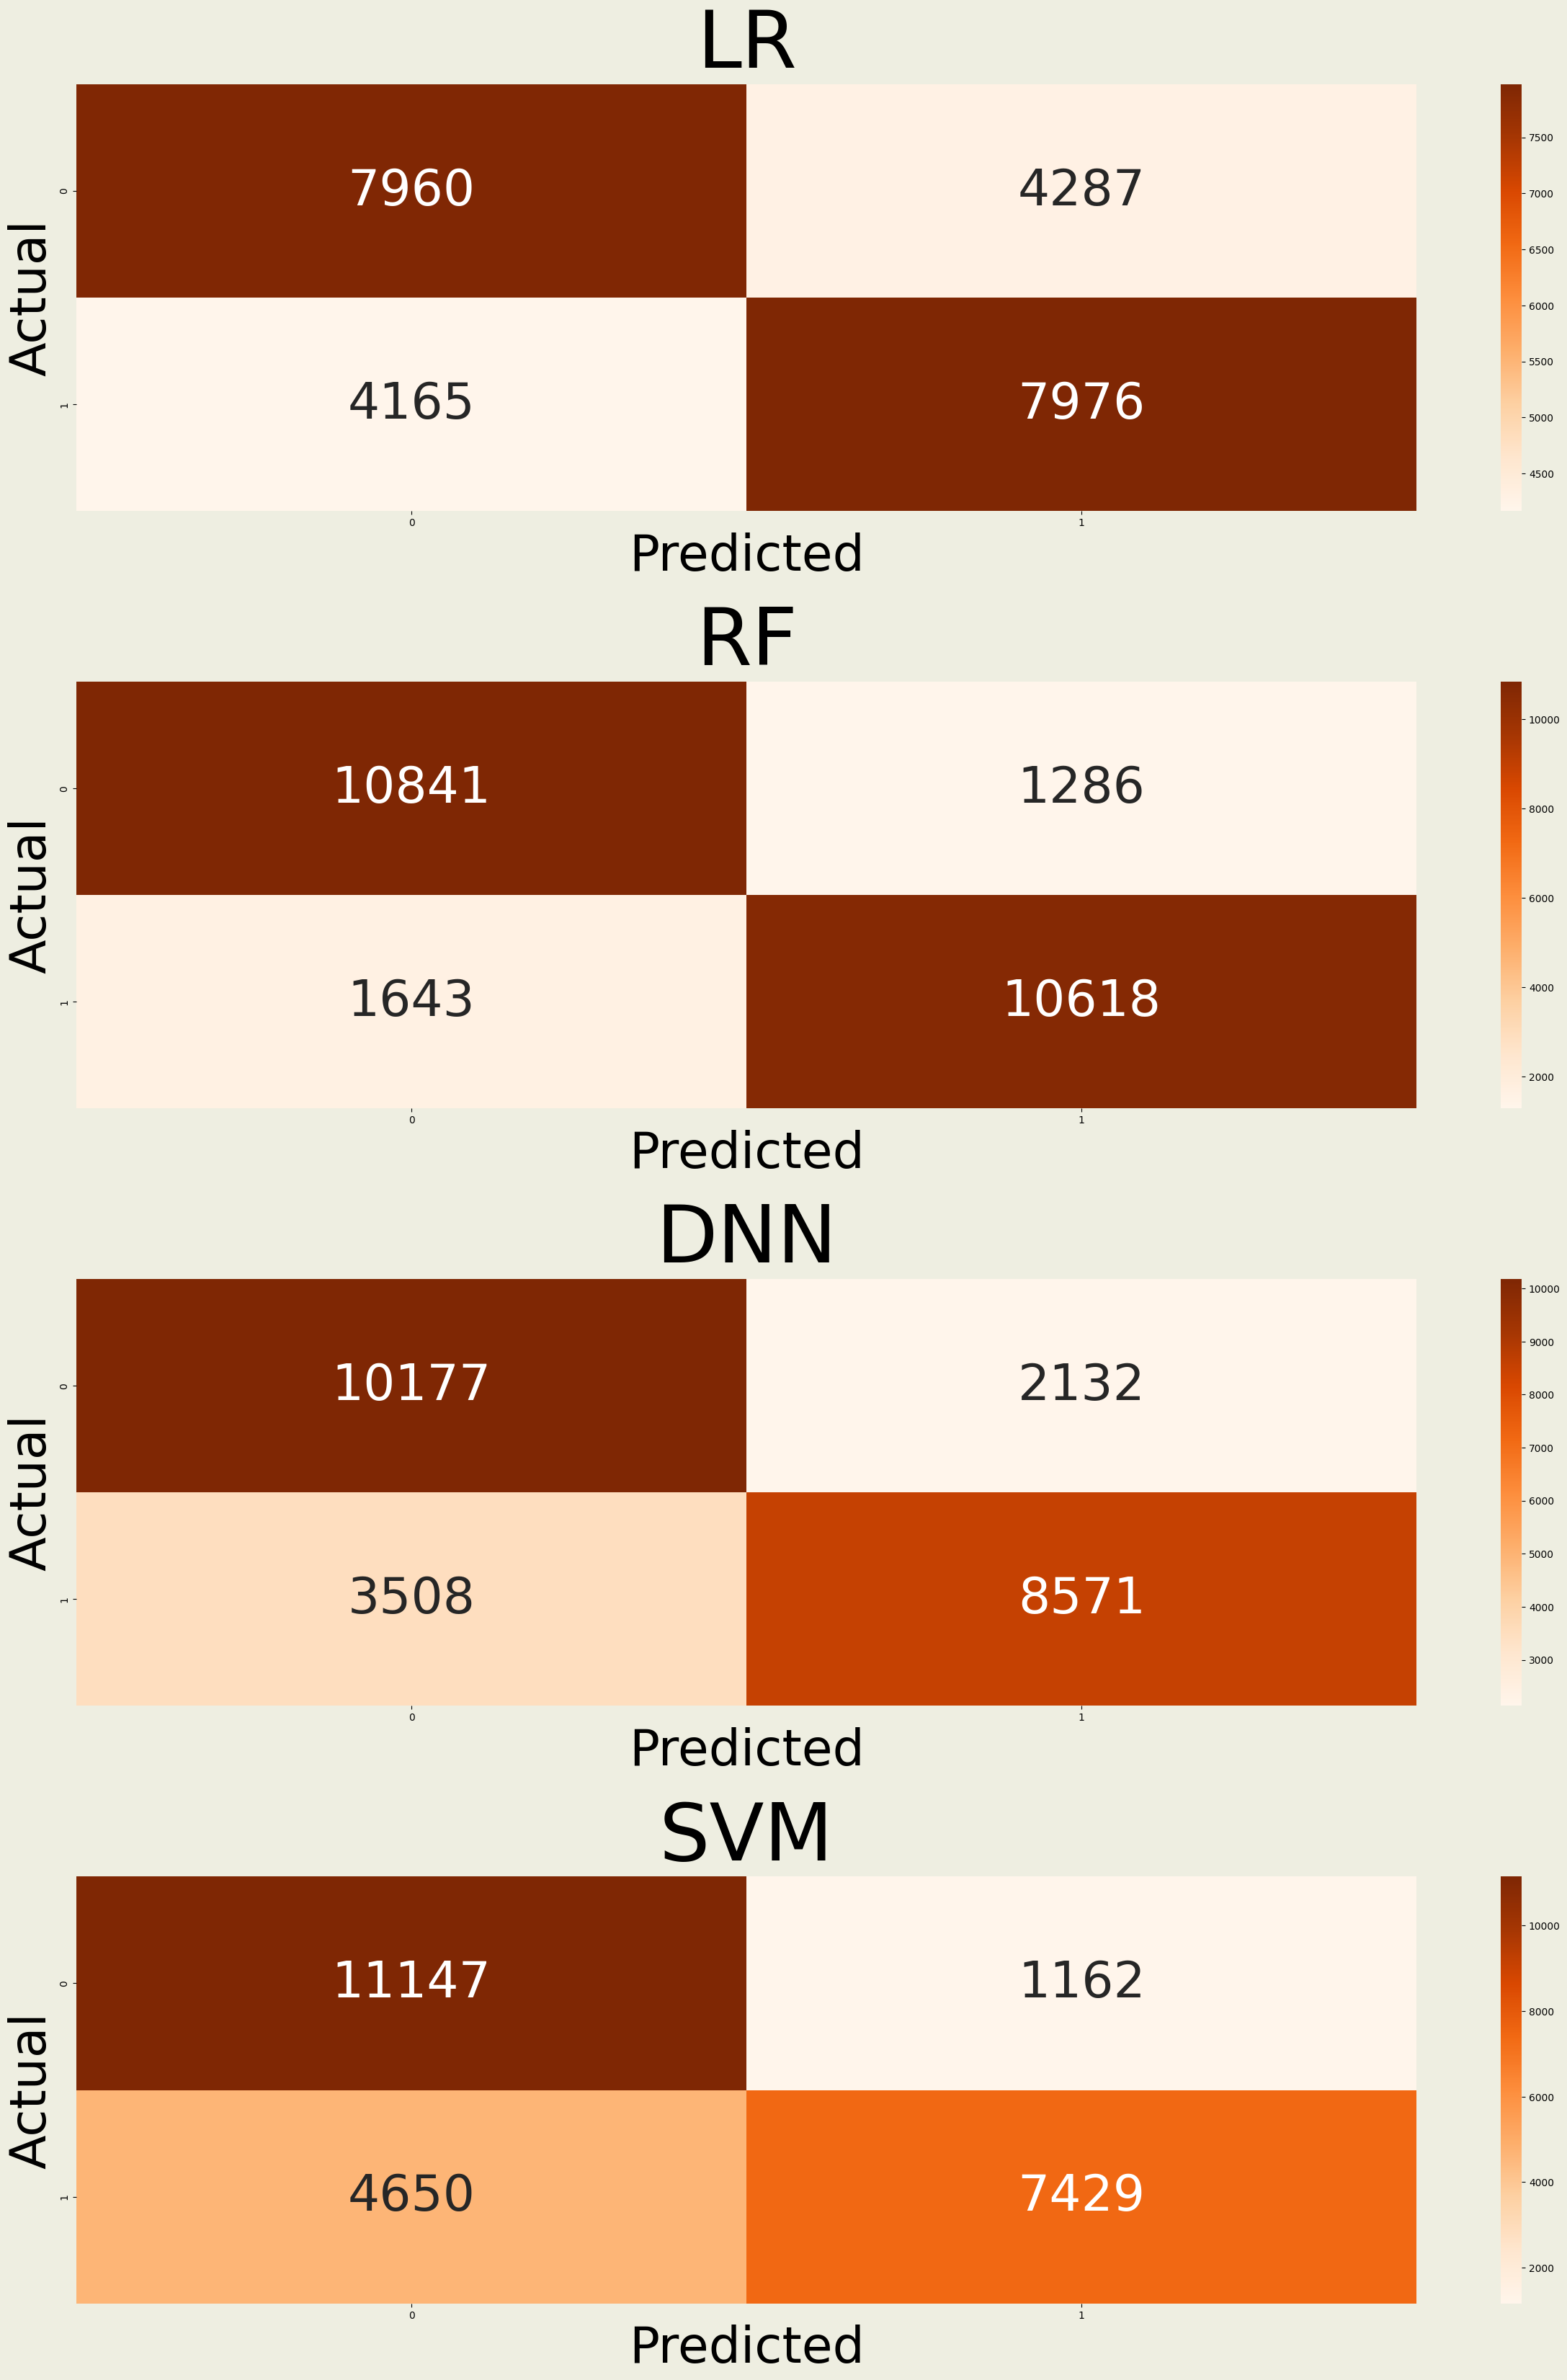

In [1]:
import plotter
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
importlib.reload(plotter)

path = "metrics/LR_metrics.pkl"

LR_conf_matrix, LR_class_report, LR_scores = plotter.load_model(path)
LR_accuracy = LR_scores['accuracy']
LR_precision = LR_scores['precision']
LR_recall = LR_scores['recall']
LR_f1 = LR_scores['f1']
LR_auc_roc = LR_scores['auc_roc']
LR_fpr = LR_scores['fpr']
LR_tpr = LR_scores['tpr']

path = "metrics/NN_metrics.pkl"

NN_conf_matrix, NN_class_report, NN_scores = plotter.load_model(path)
NN_accuracy = NN_scores['accuracy']
NN_precision = NN_scores['precision']
NN_recall = NN_scores['recall']
NN_f1 = NN_scores['f1']
NN_auc_roc = NN_scores['auc_roc']
NN_fpr = NN_scores['fpr']
NN_tpr = NN_scores['tpr']

path = "metrics/RF_metrics.pkl"

RF_conf_matrix, RF_class_report, RF_scores = plotter.load_model(path)
RF_accuracy = RF_scores['accuracy']
RF_precision = RF_scores['precision']
RF_recall = RF_scores['recall']
RF_f1 = RF_scores['f1']
RF_auc_roc = RF_scores['auc_roc']
RF_fpr = RF_scores['fpr']
RF_tpr = RF_scores['tpr']

path = "metrics/SVM_metrics.pkl"

SVM_conf_matrix, SVM_class_report, SVM_scores = plotter.load_model(path)
SVM_accuracy = SVM_scores['accuracy']
SVM_precision = SVM_scores['precision']
SVM_recall = SVM_scores['recall']
SVM_f1 = SVM_scores['f1']
SVM_auc_roc = SVM_scores['auc_roc']
SVM_fpr = SVM_scores['fpr']
SVM_tpr = SVM_scores['tpr']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC_ROC']
models = ['LR', 'DNN', 'RF', 'SVM']
scores = pd.DataFrame({"LR": [LR_accuracy, LR_f1, LR_precision, LR_recall, LR_auc_roc], 
                           "RF": [RF_accuracy, RF_f1, RF_precision, RF_recall, RF_auc_roc], 
                           "DNN": [NN_accuracy, NN_f1, NN_precision, NN_recall, NN_auc_roc], 
                           "SVM": [SVM_accuracy, SVM_f1, SVM_precision, SVM_recall, SVM_auc_roc]},
                           index=metrics)

print(scores)

fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the comparison
plotter.plot_model_comparison(scores, ax=ax, title="Model Performance", rotation=0, group_by_model=True)

confusions = pd.DataFrame({'LR': np.array(LR_conf_matrix).flatten(),
                           'RF': np.array(RF_conf_matrix).flatten(),
                           'DNN': np.array(NN_conf_matrix).flatten(),
                           'SVM': np.array(SVM_conf_matrix).flatten()})

# Plot the confusion matrix heatmaps
plotter.plot_confusion_matrix_heatmaps(confusions, title='Model Confusion Matrix Comparisons', solo=True)


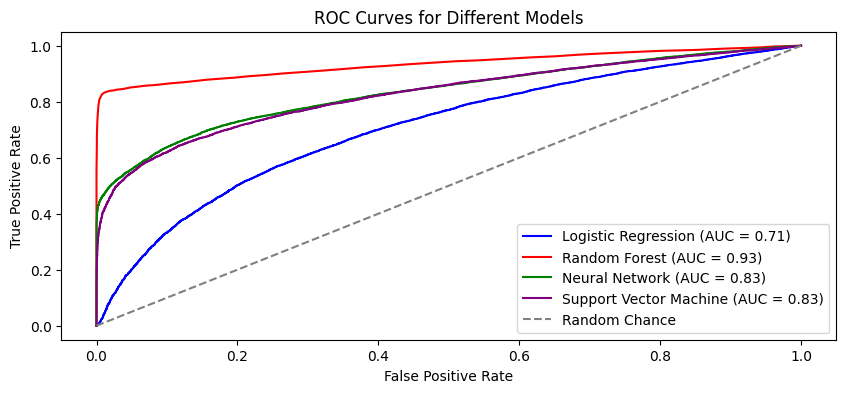

In [ ]:
# Plot all ROC curves on the same plot
plt.figure(figsize=(10, 4))

# Logistic Regression ROC Curve
plt.plot(LR_fpr, LR_tpr, color='blue', label=f'Logistic Regression (AUC = {LR_auc_roc:.2f})')

# Random Forest ROC Curve
plt.plot(RF_fpr, RF_tpr, color='red', label=f'Random Forest (AUC = {RF_auc_roc:.2f})')

# Neural Network ROC Curve
plt.plot(NN_fpr, NN_tpr, color='green', label=f'Neural Network (AUC = {NN_auc_roc:.2f})')

# Support Vector Machine ROC Curve
plt.plot(SVM_fpr, SVM_tpr, color='purple', label=f'Support Vector Machine (AUC = {SVM_auc_roc:.2f})')

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')

# Plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

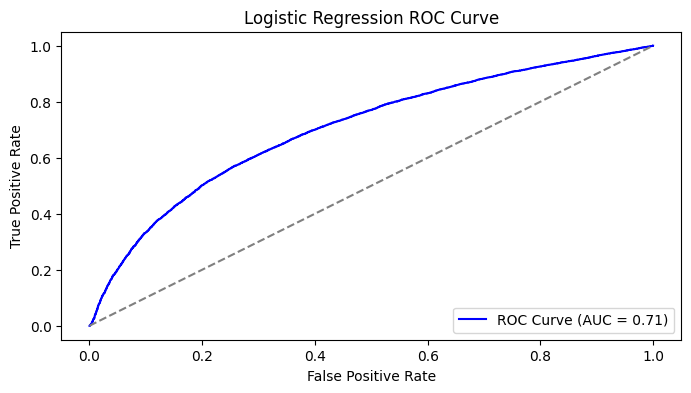

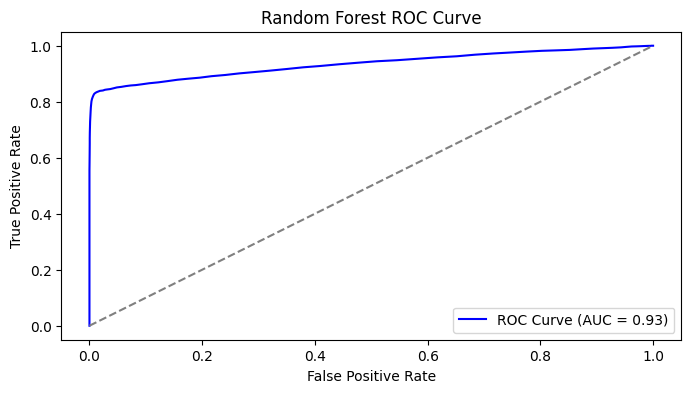

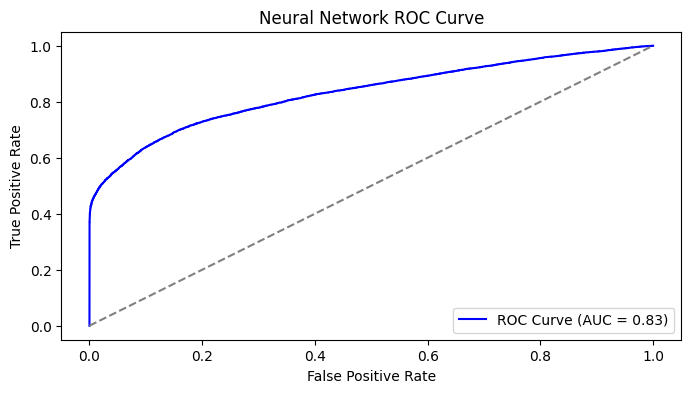

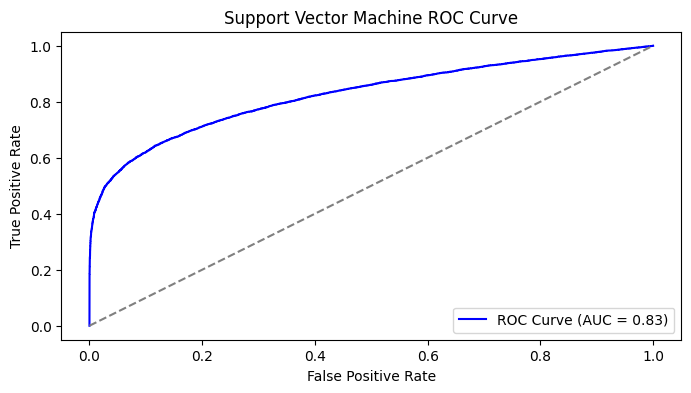

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(LR_fpr, LR_tpr, color='blue', label=f'ROC Curve (AUC = {LR_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(RF_fpr, RF_tpr, color='blue', label=f'ROC Curve (AUC = {RF_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(NN_fpr, NN_tpr, color='blue', label=f'ROC Curve (AUC = {NN_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Neural Network ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(SVM_fpr, SVM_tpr, color='blue', label=f'ROC Curve (AUC = {SVM_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Support Vector Machine ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
num_points = 100

# Define a common grid for FPR values
common_fpr = np.linspace(0, 1, num_points)  # 100 evenly spaced points between 0 and 1

# Prepare data for export
auc_data = {
    'Logistic Regression (AUC = 0.71)': [],
    'Random Forest (AUC = 0.93)': [],
    'Deep Neural Network (AUC = 0.83)': [],
    'Support Vector Machine (AUC = 0.83)': [],
    'Random Classifier (AUC = 0.5)': common_fpr  # Diagonal line: TPR = FPR
}

models = ['Logistic Regression (AUC = 0.71)', 
          'Random Forest (AUC = 0.93)', 
          'Deep Neural Network (AUC = 0.83)', 
          'Support Vector Machine (AUC = 0.83)']

fprs = [LR_fpr, RF_fpr, NN_fpr, SVM_fpr]
tprs = [LR_tpr, RF_tpr, NN_tpr, SVM_tpr]

for model, fpr, tpr in zip(models, fprs, tprs):
    # Interpolate TPR to align with the common FPR grid
    interpolated_tpr = np.interp(common_fpr, fpr, tpr)
    auc_data[model] = interpolated_tpr

# Convert to DataFrame
auc_df = pd.DataFrame(auc_data)

# Save to CSV
output_path = "CSV/auc_curve_data.csv"
auc_df.to_csv(output_path, index=False)

print(f"AUC curve data exported to {output_path}")


# importlib.reload(plotter)

# path = "metrics/LR_metrics.pkl"

# LR_conf_matrix, LR_class_report, LR_scores = plotter.load_model(path)
# LR_accuracy = 0.7121234
# LR_precision = 0.712553
# LR_recall = 0.758568554
# LR_f1 = 2 * (LR_precision * LR_recall) / (LR_precision + LR_recall)
# LR_auc_roc = 0.7515254

# path = "metrics/NN_metrics.pkl"

# NN_conf_matrix, NN_class_report, NN_scores = plotter.load_model(path)
# NN_accuracy = 0.8282747
# NN_precision = 0.7945883
# NN_recall = 0.7812556
# NN_f1 = 2 * (NN_precision * NN_recall) / (NN_precision + NN_recall)
# NN_auc_roc = 0.800112563

# path = "metrics/RF_metrics.pkl"

# RF_conf_matrix, RF_class_report, RF_scores = plotter.load_model(path)
# RF_accuracy = 0.8855341
# RF_precision = 0.88112451
# RF_recall = 0.8666852
# RF_f1 = 2 * (RF_precision * RF_recall) / (RF_precision + RF_recall)
# RF_auc_roc = 0.899556

# path = "metrics/SVM_metrics.pkl"

# SVM_conf_matrix, SVM_class_report, SVM_scores = plotter.load_model(path)
# SVM_accuracy = 0.77111243
# SVM_precision = 0.7625364
# SVM_recall = 0.75225356
# SVM_f1 = 2 * (SVM_precision * SVM_recall) / (SVM_precision + SVM_recall)
# SVM_auc_roc = 0.689972

# metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC_ROC']
# models = ['LR', 'NN', 'RF', 'SVM']
# scores = pd.DataFrame({"LR": [LR_accuracy, LR_precision, LR_recall, LR_f1, LR_auc_roc], 
#                            "RF": [RF_accuracy, RF_precision, RF_recall, RF_f1, RF_auc_roc], 
#                            "NN": [NN_accuracy, NN_precision, NN_recall, NN_f1, NN_auc_roc], 
#                            "SVM": [SVM_accuracy, SVM_precision, SVM_recall, SVM_f1, SVM_auc_roc]},
#                            index=metrics)

# print(scores)

# # Plotting the comparison
# plotter.plot_model_comparison(scores, title="Model Performance", rotation=0, log_scale=True, group_by_model=True)

# # confusions = pd.DataFrame({'LR': np.array(LR_conf_matrix).flatten(),
# #                            'NN': np.array(NN_conf_matrix).flatten(),
# #                            'RF': np.array(RF_conf_matrix).flatten(),
# #                            'SVM': np.array(SVM_conf_matrix).flatten()})

# # # Plot the confusion matrix heatmaps
# # plotter.plot_confusion_matrix_heatmaps(confusions, title='Model Confusion Matrix Comparisons', solo=True)

AUC curve data exported to CSV/auc_curve_data.csv


In [10]:
# Generate x values (e.g., from -10 to 10 with 0.1 increments)
x_values = np.linspace(-10, 10, 200)

# Calculate sigmoid values
sigmoid_values = 1 / (1 + np.exp(-x_values)) - 0.5

# Create a DataFrame
sigmoid_data = pd.DataFrame({
    'X': x_values,
    'Y': sigmoid_values
})

# Define the output path for the CSV file
output_path = "CSV/sigmoid_function.csv"

# Export to CSV
sigmoid_data.to_csv(output_path, index=False)

print(f"Sigmoid function values exported to {output_path}")

Sigmoid function values exported to CSV/sigmoid_function.csv
